# Stroke Classification with Logistic Regression and SVM


**Context**  
- According to the **World Health Organization (WHO)**, **stroke is the 2nd leading cause of death globally**, responsible for approximately **11% of total deaths**.  
- This dataset is used to **predict whether a patient is likely to experience a stroke** based on health and lifestyle factors such as **age, hypertension, heart disease, glucose levels, BMI, and smoking status**.  
- Each row represents **one patient’s medical and lifestyle information**.



**Attribute Information**

1. **id** → Unique identifier  
2. **gender** → `"Male"`, `"Female"`, or `"Other"`  
3. **age** → Age of the patient  
4. **hypertension** → `0 = No`, `1 = Yes`  
5. **heart_disease** → `0 = No`, `1 = Yes`  
6. **ever_married** → `"No"` or `"Yes"`  
7. **work_type** → `"children"`, `"Govt_job"`, `"Never_worked"`, `"Private"`, `"Self-employed"`  
8. **Residence_type** → `"Rural"` or `"Urban"`  
9. **avg_glucose_level** → Average blood glucose level  
10. **bmi** → Body Mass Index  
11. **smoking_status** → `"formerly smoked"`, `"never smoked"`, `"smokes"`, or `"Unknown"`  
    - *Note*: `"Unknown"` means **no smoking information available** for the patient.  
12. **stroke** → Target variable  
    - `1 = Patient had a stroke`  
    - `0 = Patient did not have a stroke`  



This dataset is widely used in **binary classification problems** where the goal is to build a model that predicts the likelihood of stroke.  


In [95]:
!ls

Stroke Prediction.ipynb
healthcare-dataset-stroke-data.csv


## EDA &  Data Cleaning

In [96]:
# Having a quick look at the data before reading it
!head healthcare-dataset-stroke-data.csv 

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [98]:
# Reading the dataset into a dataFrame
healthcare_file = "healthcare-dataset-stroke-data.csv"

health_df = pd.read_csv(healthcare_file)
health_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [99]:
# Exploring the columns of the dataFrame

health_df.info()
print('=' * 50)
print(f'number of rows: {health_df.shape[0]}, number of columns {health_df.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
number of rows: 5110, number of columns 12


The DataFrame has 5110 rows and 12 columns, including both numerical and categorical features. The `bmi` column appears to have missing values, as it contains only 4909 entries.  
Further investigation is required.

Using the sum method, we can then return the number of missing values per column as follows

In [100]:
health_df.isnull().sum() # Check for missing values in each column of the dataset

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

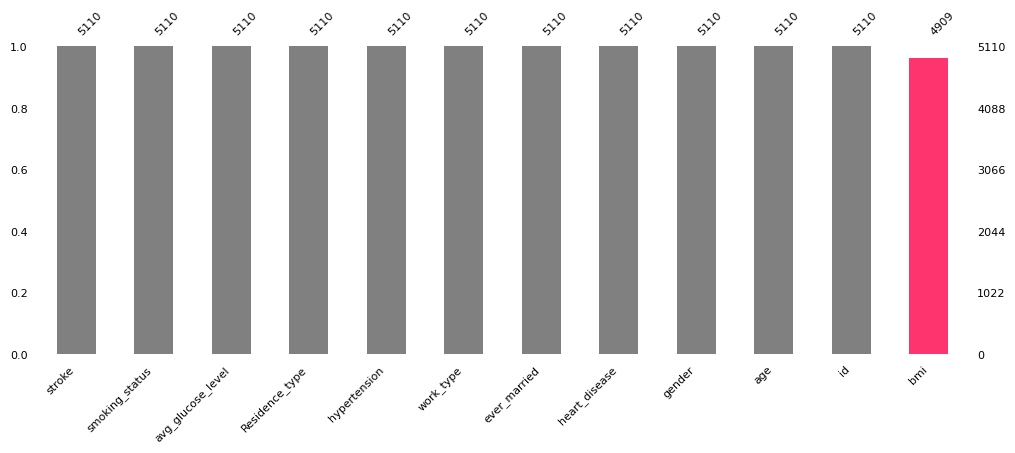

In [101]:
import missingno as msno
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','#fe346e']
fig, ax = plt.subplots(figsize = (12,4))


msno.bar(health_df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')


plt.show()

As expected there are 201 missing entries in the bmi column

In [102]:
# Checking for duplicates
health_df.duplicated().sum()

np.int64(0)

No duplicates in the data

Before handling the missing values in the bmi column, it’s a good idea to first examine its distribution.

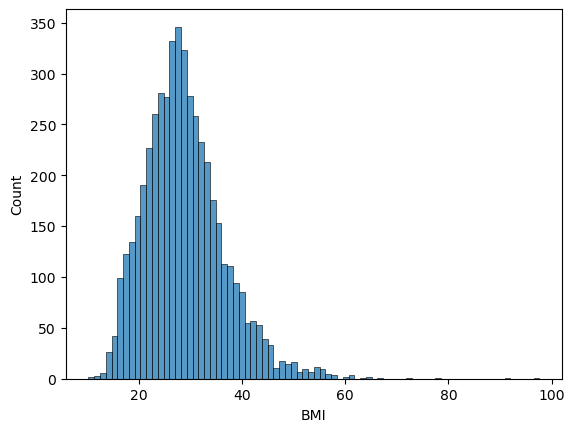

In [103]:
# Visualize the distribution of the 'bmi' feature
sns.histplot(data=health_df, x='bmi')
plt.xlabel("BMI")
plt.show()

In [104]:
health_df['bmi'].mean() # Calculate the mean of the 'bmi' column


np.float64(28.893236911794666)

Since the histogram above suggests that bmi is approximately normally distributed, imputing its missing values with the mean is a reasonable and safe approach.

In [105]:
# Impute missing values in the 'bmi' column with the mean
health_df['bmi'] = health_df.bmi.fillna(health_df['bmi'].mean())

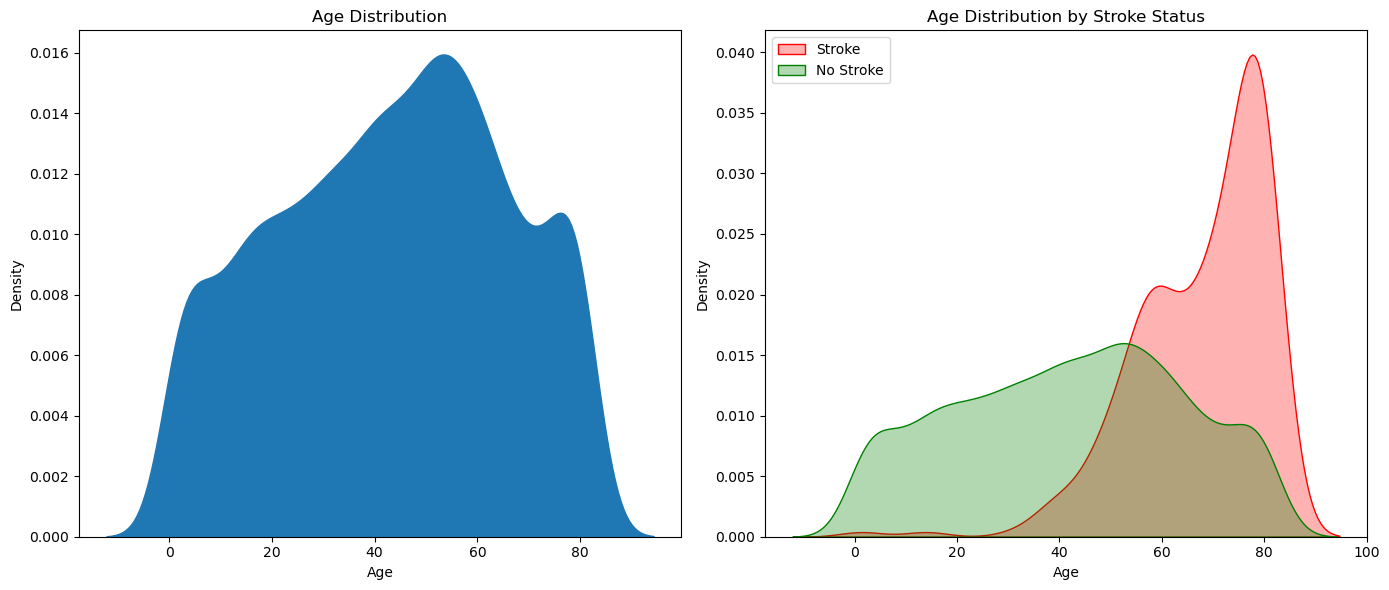

In [106]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 6), nrows=1, ncols=2)

age_stroke = health_df[health_df['stroke'] == 1]['age']
age_no_stroke = health_df[health_df['stroke'] == 0]['age']

# Overall age distribution
sns.kdeplot(data=health_df, x='age', fill=True, alpha=1, ax=ax1)
ax1.set_title('Age Distribution')
ax1.set_xlabel("Age")
ax1.set_ylabel("Density")

# Age distribution by stroke status
sns.kdeplot(age_stroke, color='red', fill=True, alpha=0.3, ax=ax2)
sns.kdeplot(age_no_stroke, color='green', fill=True, alpha=0.3, ax=ax2)
ax2.set_xlabel('Age')
ax2.set_ylabel('Density')
ax2.set_title('Age Distribution by Stroke Status')
ax2.legend(['Stroke', 'No Stroke'],loc='upper left')

plt.tight_layout()
plt.show()


The `age` feature does not follow a normal distribution, as observed in the plot above. It appears that older individuals are more likely to experience strokes compared to younger ones.   
The next step is to statistically assess this relationship. Since the distribution is not normal, a `Mann–Whitney U` test would be an appropriate choice.

In [107]:
from scipy.stats import shapiro, mannwhitneyu


# Perform Shapiro-Wilk test on the 'age' column of the dataset to check normality
stat_shapiro1, p_shapiro1 = shapiro(health_df['age'])
print("\nShapiro–Wilk test for age column:")
print("Statistic:", stat_shapiro1)
print("p-value:", p_shapiro1)
if p_shapiro1 < 0.05:
    print("Not normally distributed.")
else:
    print("Normally distributed.")

print("=" * 50)
# Compare ages between stroke and non-stroke groups using Mann–Whitney U test
stat, p = mannwhitneyu(age_stroke, age_no_stroke)
print("Mann–Whitney U test statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("There is a significant difference in age between stroke and non-stroke groups.")
else:
    print("No significant difference in age between stroke and non-stroke groups.")



Shapiro–Wilk test for age column:
Statistic: 0.9672428955895169
p-value: 1.3789355302240572e-32
Not normally distributed.
Mann–Whitney U test statistic: 1010125.5
p-value: 3.726634665900011e-71
There is a significant difference in age between stroke and non-stroke groups.


D:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5110.
  res = hypotest_fun_out(*samples, **kwds)


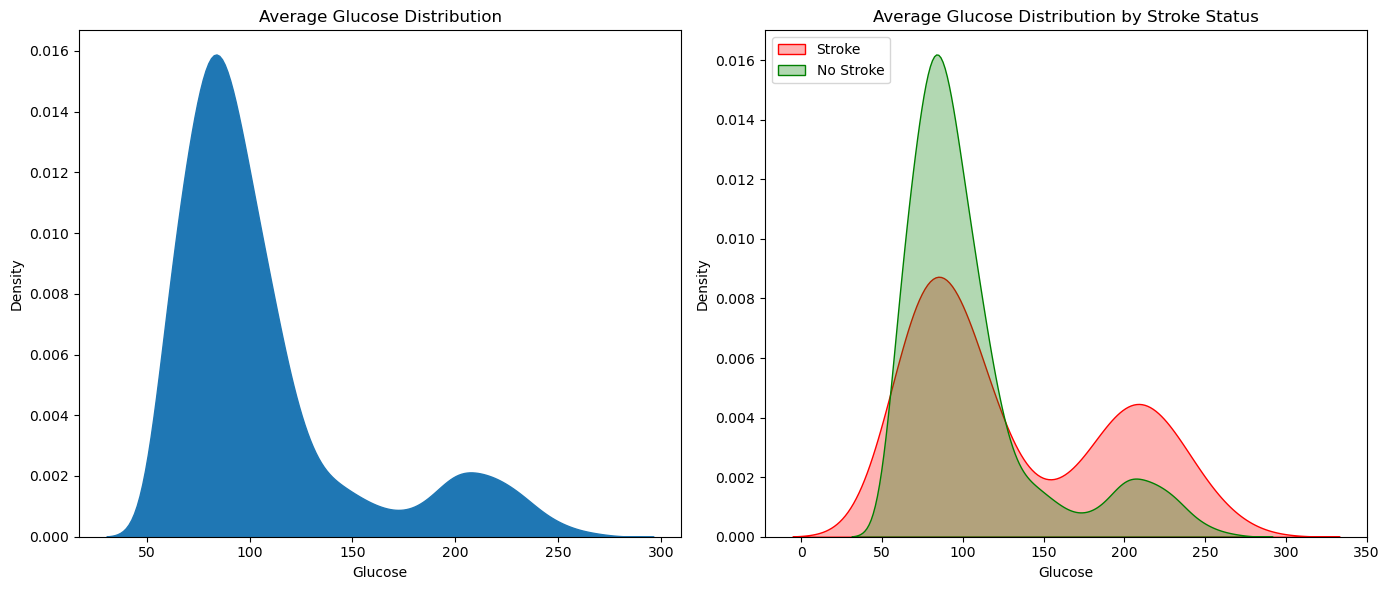

In [108]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 6), nrows=1, ncols=2)

glucose_level_stroke = health_df[health_df['stroke'] == 1]['avg_glucose_level']
glucose_level_no_stroke = health_df[health_df['stroke'] == 0]['avg_glucose_level']

# Overall age distribution
sns.kdeplot(data=health_df, x='avg_glucose_level', fill=True, alpha=1, ax=ax1)
ax1.set_title('Average Glucose Distribution')
ax1.set_xlabel("Glucose")
ax1.set_ylabel("Density")

# Age distribution by stroke status
sns.kdeplot(glucose_level_stroke, color='red', fill=True, alpha=0.3, ax=ax2)
sns.kdeplot(glucose_level_no_stroke, color='green', fill=True, alpha=0.3, ax=ax2)
ax2.set_xlabel('Glucose')
ax2.set_ylabel('Density')
ax2.set_title('Average Glucose Distribution by Stroke Status')
ax2.legend(['Stroke', 'No Stroke'],loc='upper left')

plt.tight_layout()
plt.show()

Glucose level distribution is right skewed and most of  strokes can be seen people with regular glucose levels

In [109]:
# Perform the Mann–Whitney U test on glucose levels
stat, p = mannwhitneyu(glucose_level_stroke, glucose_level_no_stroke)
print("Mann–Whitney U test statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("There is a significant difference in glucose levels between stroke and non-stroke groups.")
else:
    print("No significant difference in glucose levels between stroke and non-stroke groups.")


Mann–Whitney U test statistic: 739150.0
p-value: 3.6403672710893236e-09
There is a significant difference in glucose levels between stroke and non-stroke groups.


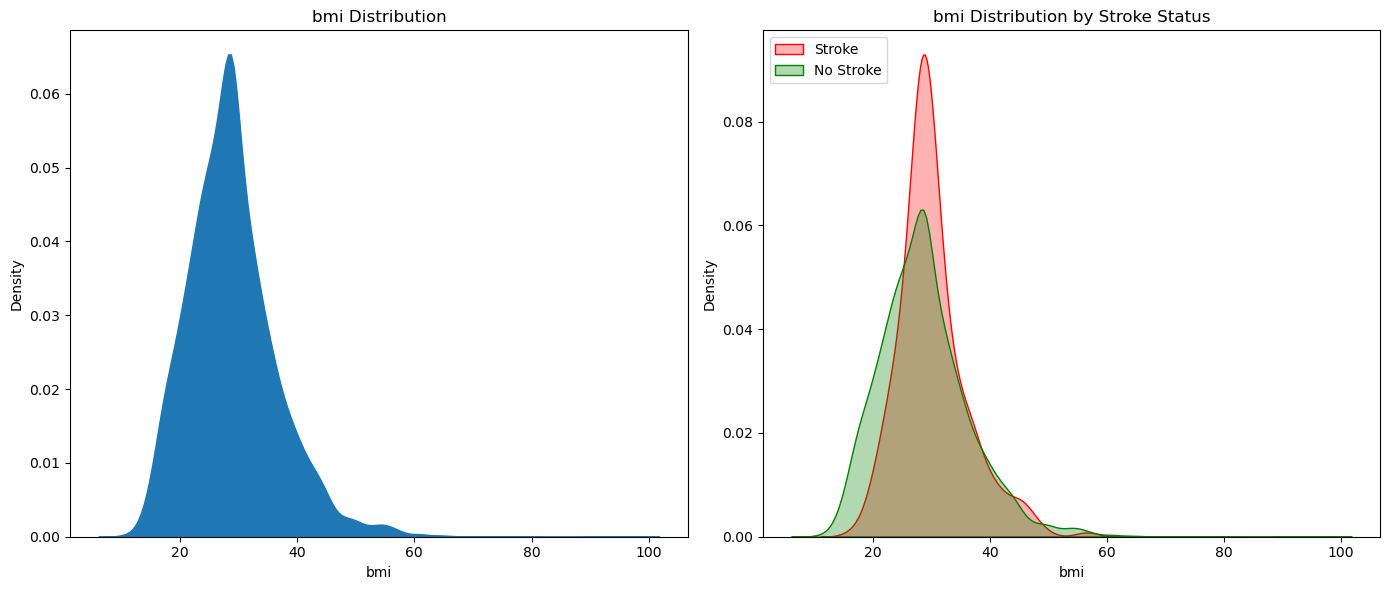

In [110]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 6), nrows=1, ncols=2)

bmi_stroke = health_df[health_df['stroke'] == 1]['bmi']
bmi_no_stroke = health_df[health_df['stroke'] == 0]['bmi']

# Overall age distribution
sns.kdeplot(data=health_df, x='bmi', fill=True, alpha=1, ax=ax1)
ax1.set_title('bmi Distribution')
ax1.set_xlabel("bmi")
ax1.set_ylabel("Density")

# Age distribution by stroke status
sns.kdeplot(bmi_stroke, color='red', fill=True, alpha=0.3, ax=ax2)
sns.kdeplot(bmi_no_stroke, color='green', fill=True, alpha=0.3, ax=ax2)
ax2.set_xlabel('bmi')
ax2.set_ylabel('Density')
ax2.set_title('bmi Distribution by Stroke Status')
ax2.legend(['Stroke', 'No Stroke'],loc='upper left')

plt.tight_layout()
plt.show()

In [111]:
# Perform Shapiro-Wilk test on the 'bmi' column of the dataset to check normality
stat_shapiro1, p_shapiro1 = shapiro(health_df['bmi'])
print("\nShapiro–Wilk test for bmi column:")
print("Statistic:", stat_shapiro1)
print("p-value:", p_shapiro1)
if p_shapiro1 < 0.05:
    print("Not normally distributed.")
else:
    print("Normally distributed.")

print("=" * 50)
# Compare BMI values between stroke and non-stroke groups using Mann–Whitney U test
stat, p = mannwhitneyu(bmi_stroke, bmi_no_stroke)
print("Mann–Whitney U test statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("There is a significant difference in bmi between stroke and non-stroke groups.")
else:
    print("No significant difference in bmi between stroke and non-stroke groups.")



Shapiro–Wilk test for bmi column:
Statistic: 0.9516710137669999
p-value: 4.2821174680932366e-38
Not normally distributed.
Mann–Whitney U test statistic: 694474.5
p-value: 8.414486201742612e-05
There is a significant difference in bmi between stroke and non-stroke groups.


D:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5110.
  res = hypotest_fun_out(*samples, **kwds)


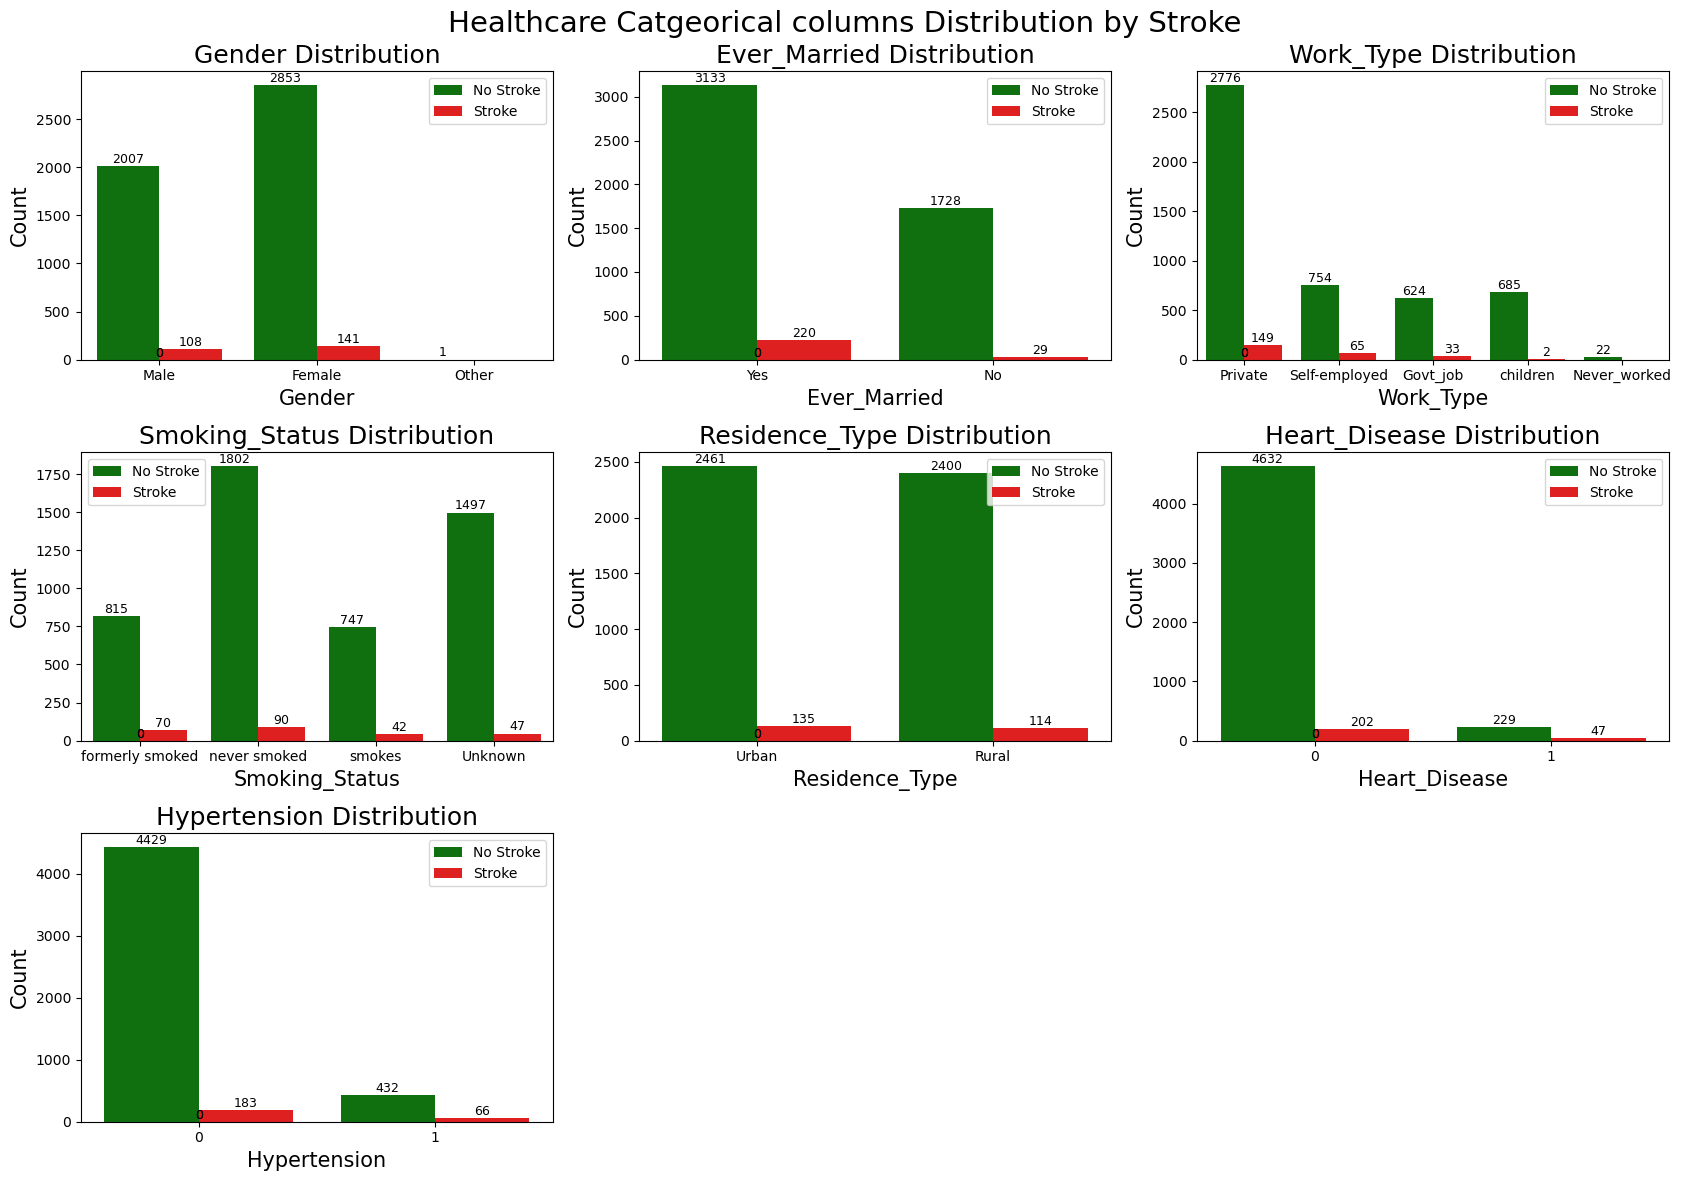

In [112]:
# choose features for the subplots
features = ['gender', 
       'ever_married', 
       'work_type', 
       'smoking_status', 
       'Residence_type',
        'heart_disease',
        'hypertension'
       ]
# choose how many columns you want
num_cols = 3
# set a number of rows
if len(features)%num_cols == 0:
    num_rows = len(features)//num_cols
else:
    num_rows = (len(features)//num_cols) + 1
# define the figure and axes
fig, ax = plt.subplots(figsize=(17,12), 
                       nrows=num_rows, 
                       ncols=num_cols)

ax = ax.flatten()

# add a figure title
fig.suptitle('Healthcare Catgeorical columns Distribution by Stroke', 
             fontsize=21)
#use a for loop to create each subplot:
for i, feat in enumerate(features):
    sns.countplot(data=health_df, x=feat, hue='stroke', palette={0: 'green', 1: 'red'}, ax=ax[i])
    ax[i].set_title(feat.title()+' Distribution', fontsize=18)
    ax[i].set_xlabel(feat.title(), fontsize=15)
    ax[i].set_ylabel('Count', fontsize=15)
    ax[i].legend(['No Stroke','Stroke'])
    
    # add counts above bars
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x() + p.get_width()/2, height + 1, int(height), 
                   ha='center', va='bottom', fontsize=9)

# remove unused subplots if any
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

In [113]:
from scipy.stats import chi2_contingency
# List of categorical features to test for association with 'stroke'
chi_test_features = ['gender', 
       'ever_married', 
       'work_type', 
       'smoking_status', 
       'Residence_type',
        'heart_disease',
        'hypertension']

# Loop through each feature and perform Chi-square test
for feature in chi_test_features:
    churn_crosstab = pd.crosstab(health_df['stroke'], health_df[feature])
    chi, p, dof, expected = chi2_contingency(churn_crosstab)
    print("=" * 50)
    print("Chi-square statistic:", chi)
    print(f'All expected > 5 : {np.all(expected > 5)}') # Check assumption of Chi-square test
    print("p-value:", p)
    if p < 0.05:
        print(f'There is a significant relationship between stroke and {feature}.')
    else:
        print(f'No significant relationship between stroke and {feature}.')

Chi-square statistic: 0.47258662884530234
All expected > 5 : False
p-value: 0.7895490538408245
No significant relationship between stroke and gender.
Chi-square statistic: 58.923890259034195
All expected > 5 : True
p-value: 1.6389021142314745e-14
There is a significant relationship between stroke and ever_married.
Chi-square statistic: 49.163511976675295
All expected > 5 : False
p-value: 5.397707801896119e-10
There is a significant relationship between stroke and work_type.
Chi-square statistic: 29.147269191399264
All expected > 5 : True
p-value: 2.0853997025008455e-06
There is a significant relationship between stroke and smoking_status.
Chi-square statistic: 1.0816367471627524
All expected > 5 : True
p-value: 0.29833169286876987
No significant relationship between stroke and Residence_type.
Chi-square statistic: 90.25956125843324
All expected > 5 : True
p-value: 2.088784568522924e-21
There is a significant relationship between stroke and heart_disease.
Chi-square statistic: 81.605368

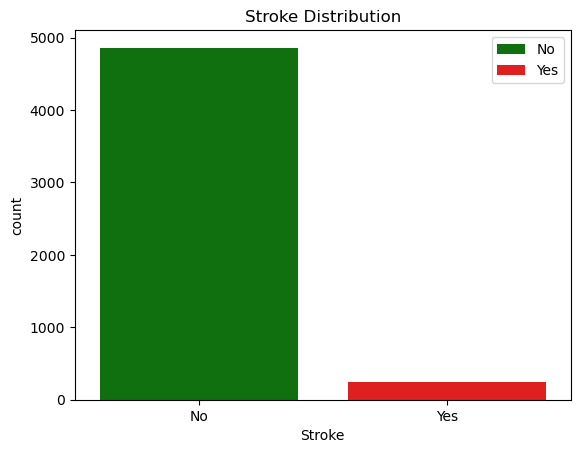

In [114]:
# Create a count plot for the 'stroke' variable
sns.countplot(data=health_df, x='stroke',hue='stroke', palette={'green', 'red'})

plt.xlabel("Stroke")
plt.xticks(['0', '1'], ['No', 'Yes'] )
plt.title("Stroke Distribution")
plt.legend(['No', 'Yes'])
plt.show()

The target feature, Stroke, is highly imbalanced, meaning one class (e.g., no-stroke) dominates the dataset. This imbalance will need to be addressed later, for example, through resampling techniques (oversampling, undersampling, or SMOTE) or by using class-weighted models to ensure the predictive model doesn’t become biased toward the majority class.

## Data preprocessing & Modeling

Encoding categorical columns and combining them with numerical columns into a single DataFrame

In [115]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select categorical and numerical columns
categorical_columns = health_df.select_dtypes(include=["object"]).columns
numerical_columns = health_df.select_dtypes(include=["int", "float"]).columns
# Define OneHotEncoder with drop= first to avoid multicollinearity
ohe = OneHotEncoder(categories='auto', drop='first')

# Define ColumnTransformer
c_transfer = ColumnTransformer([
    ('onehot', ohe, categorical_columns),
    ('nothing', 'passthrough', numerical_columns)
])
# Fit and transform
health_array = c_transfer.fit_transform(health_df).astype(float)
# Convert to DataFrame and dropping the `id` column
health_df = pd.DataFrame(health_array, columns=c_transfer.get_feature_names_out()).drop(columns=["nothing__id"])

In [116]:
# Display the first two rows of the processed dataset
health_df.head()

,onehot__gender_Male,onehot__gender_Other,onehot__ever_married_Yes,onehot__work_type_Never_worked,onehot__work_type_Private,onehot__work_type_Self-employed,onehot__work_type_children,onehot__Residence_type_Urban,onehot__smoking_status_formerly smoked,onehot__smoking_status_never smoked,onehot__smoking_status_smokes,nothing__age,nothing__hypertension,nothing__heart_disease,nothing__avg_glucose_level,nothing__bmi,nothing__stroke
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69,36.600000,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0,0.0,202.21,28.893237,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,105.92,32.500000,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,49.0,0.0,0.0,171.23,34.400000,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12,24.000000,1.0


In [117]:
# Display shape of the processed dataset
health_df.shape

(5110, 17)

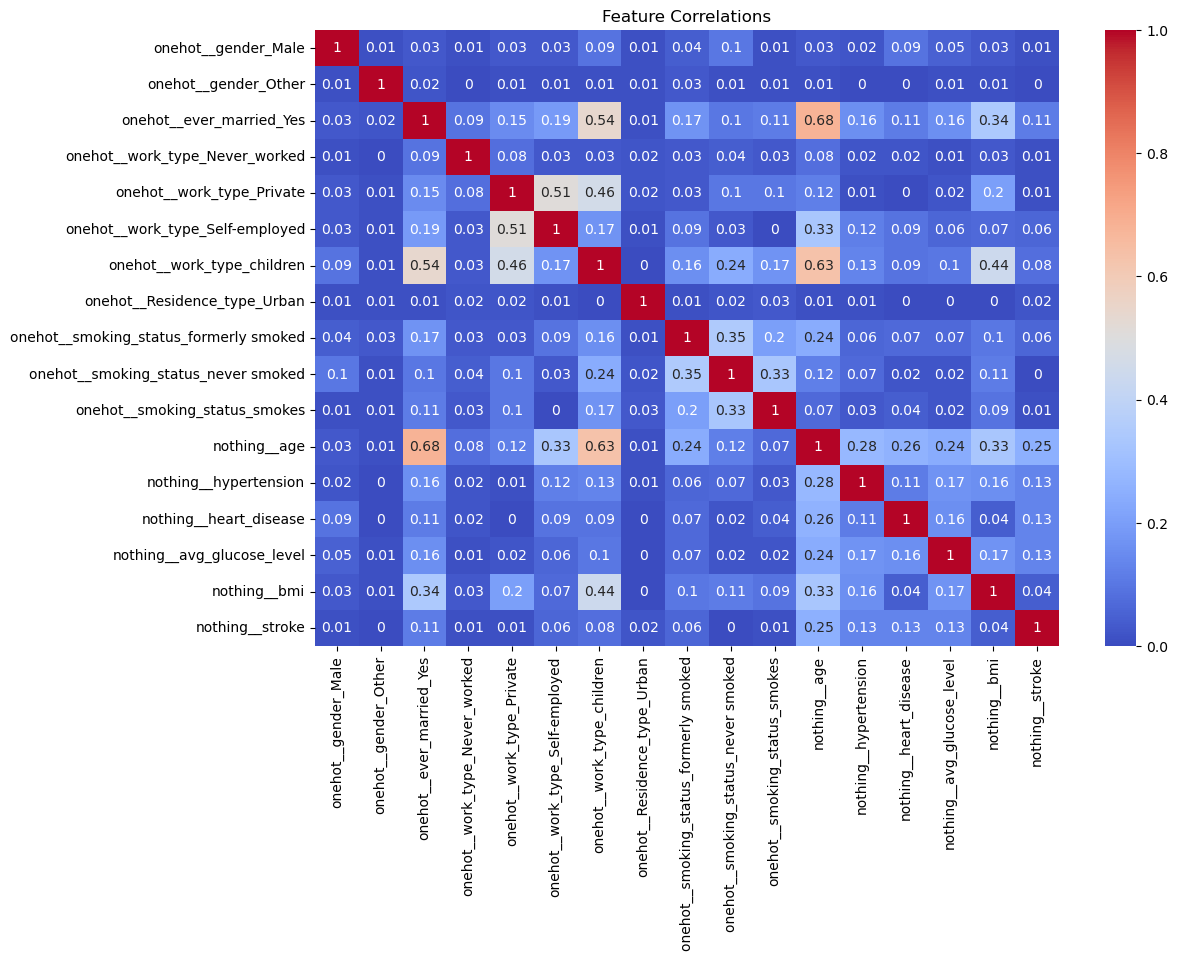

In [118]:
# checking for correlations between columns
plt.figure(figsize=(12,8))
corr_matrix = health_df.corr().abs().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

In [136]:
from sklearn.model_selection import train_test_split

# Split features and target
X, y = health_df.iloc[:, :16].values, health_df.iloc[:,16].values
# Split into train and test sets with stratify to maintain the same proportion of classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,
                                                    stratify=y)

## Logistic Regression Model

In [137]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef, make_scorer

# Define scorer using Matthews Correlation Coefficient (MCC)
scorer = make_scorer(matthews_corrcoef)
# Initialize Logistic Regression model
lr = LogisticRegression()
# Define Sequential Feature Selector (SFS)
sfs = SFS(lr, k_features='best', forward=True,scoring=scorer,floating=True, cv=5, n_jobs=-1)

# Build pipeline for the Logistic Regression
pipe_lr = Pipeline([
    ('smote', SMOTE()),      # Handle class imbalance with oversampling
    ('scaler', StandardScaler()),      # Standardize features     
    ('feature_selector', sfs),              # Select the best feature subset
    ('classifier', lr)                      # Train Logistic Regression classifier
])

# fit the pipeline on training data
pipe_lr.fit(X_train, y_train)

# Evaluate model using 10-fold cross-validation and MCC as score
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         scoring=scorer,
                         cv=10,
                         n_jobs=-1)
# Print individual CV scores
print(f'CV accuracy scores: {scores}')
print('=' * 50)
# Print mean and standard deviation of CV scores
print(f'CV accuracy: {np.mean(scores):.3f} 'f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.21573257 0.22918947 0.26427766 0.27375524 0.24908508 0.25341479
 0.34866463 0.30872498 0.28442856 0.1534303 ]
CV accuracy: 0.258 +/- 0.050


Matthews Correlation Coefficient (MCC) is preferred for imbalanced datasets because it considers all four outcomes of the confusion matrix, true positives, true negatives, false positives, and false negatives, providing a balanced measure even when class sizes differ. In contrast, ROC AUC can be overly optimistic for the majority class in imbalanced data (Chicco & Jurman, 2023)

Chicco, D., Jurman, G. The Matthews correlation coefficient (MCC) should replace the ROC AUC as the standard metric for assessing binary classification. BioData Mining 16, 4 (2023). https://doi.org/10.1186/s13040-023-00322-4


MCC values range from -1 to +1:
- 1 means perfect prediction
- 0 means random prediction (no better than chance)
- -1 means total disagreement between prediction and observation

## Model Diagnostics and Performance Evaluation

First a confusion matrix to compare actual vs predicted

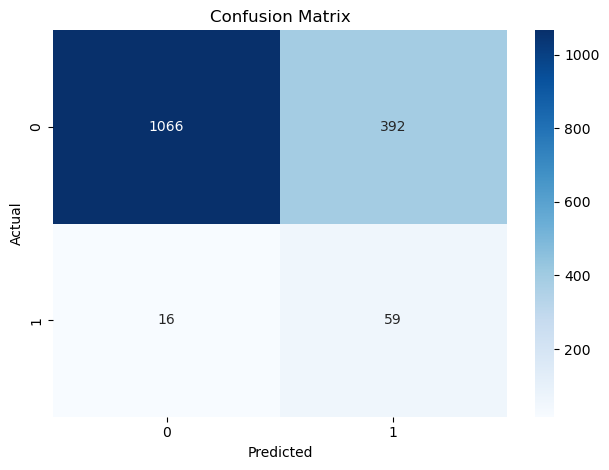

In [138]:
from sklearn.metrics import confusion_matrix
# Predict on the test set
y_pred = pipe_lr.predict(X_test)

# Compute the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')



plt.tight_layout()
plt.show()b

Retrieve the names of the features selected by the Sequential Feature Selector

In [139]:
# Get the indices of the features selected by the Sequential Feature Selector
cols = pipe_lr['feature_selector'].k_feature_idx_
# Loop through the selected feature indices and add them to col_num
col_num =[]
for i in cols:
    col_num.append(i)
# Use the selected indices to retrieve the corresponding column names from health_df
health_df.iloc[:,col_num].columns

Index(['onehot__gender_Male', 'onehot__gender_Other',
       'onehot__ever_married_Yes', 'onehot__work_type_Private',
       'onehot__work_type_Self-employed', 'onehot__Residence_type_Urban',
       'onehot__smoking_status_formerly smoked',
       'onehot__smoking_status_never smoked', 'nothing__age',
       'nothing__hypertension', 'nothing__bmi'],
      dtype='object')

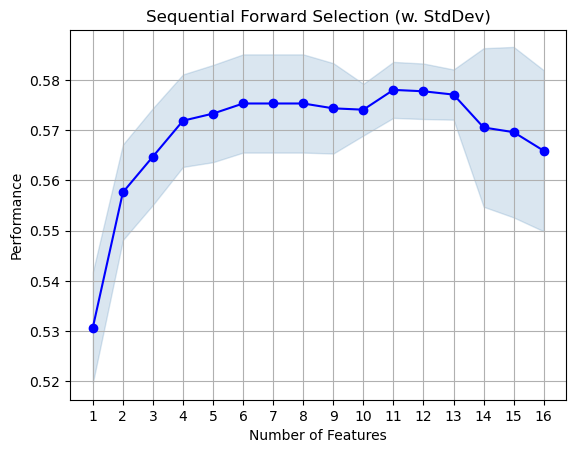

In [140]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# Get metrics from the fitted Sequential Feature Selector
metric_dict = pipe_lr['feature_selector'].get_metric_dict(confidence_interval=0.95)
# Plot the sequential feature selection results
fig1 = plot_sfs(metric_dict, kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

[learning_curve] Training set sizes: [ 286  429  572  715  858 1001 1144 1287 1430 1573 1716 1859 2002 2145
 2288 2431 2574 2717 2861]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  95 | elapsed:  2.4min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:  4.3min finished


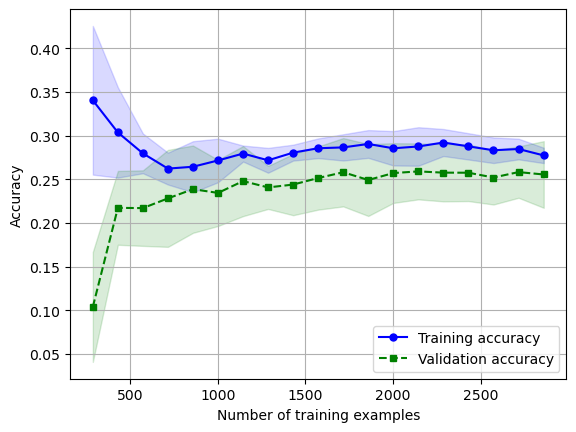

In [141]:
from sklearn.model_selection import learning_curve
# Compute learning curves for the pipeline
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1,1.0,19),
                                                        cv=5,
                                                        scoring=scorer,
                                                        verbose=2,
                                                        n_jobs=-1)
# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation of validation scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot learning curve
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

The plot above indicates that the model demonstrates a good bias-variance trade-off, with no clear signs of underfitting or overfitting

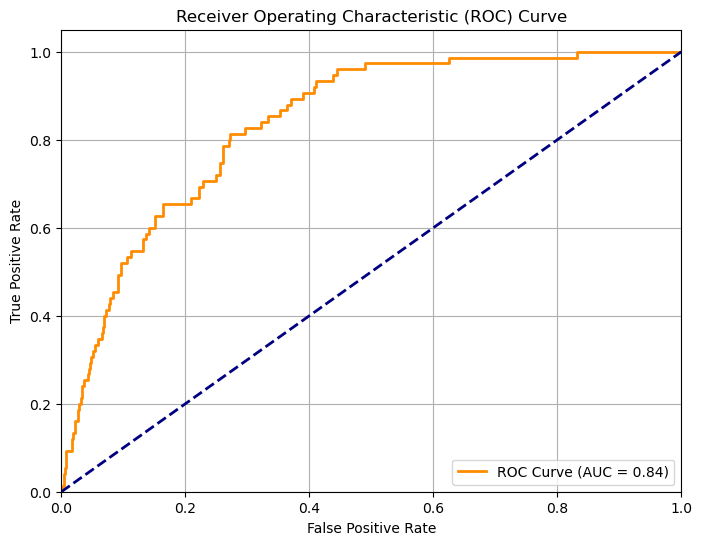

In [142]:
from sklearn.metrics import roc_curve, auc


# Predict class probabilities 
y_pred_proba = pipe_lr.predict_proba(X_test)[:, 1]

# 1. Get the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 2. Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# 3. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [146]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import scipy.stats

# Define a log-uniform distribution for the regularization parameter C
param_range = scipy.stats.loguniform(0.0001, 1000.0)

# Define the parameter grid for Logistic Regression inside the pipeline
param_grid = [{'classifier__C': param_range,
               'classifier__solver': ['liblinear'],
               'classifier__penalty': ['l1','l2']
              },
              {'classifier__C': param_range,
               'classifier__solver': ['lbfgs'],
               'classifier__penalty': ['l2']
              }]
# Initialize HalvingRandomSearchCV for hyperparameter tuning
hs_lr = HalvingRandomSearchCV(pipe_lr,
                           param_distributions=param_grid,
                           n_candidates='exhaust',
                           resource='n_samples',
                           min_resources=300,
                           factor=1.5,
                           random_state=1,
                           scoring=scorer,
                           error_score='raise',
                           n_jobs=-1)
# Fit the hyperparameter search on the training data
hs_lr = hs_lr.fit(X_train, y_train)
# Print the best cross-validated score
print(hs_lr.best_score_)

# Print the best hyperparameters found
print(hs_lr.best_params_)
# Evaluate the best model on the test set
print(f'Test Accuracy: {hs_lr.score(X_test, y_test):.3f}')

0.2610124099718255
{'classifier__C': np.float64(0.12710723059975748), 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Test Accuracy: 0.247


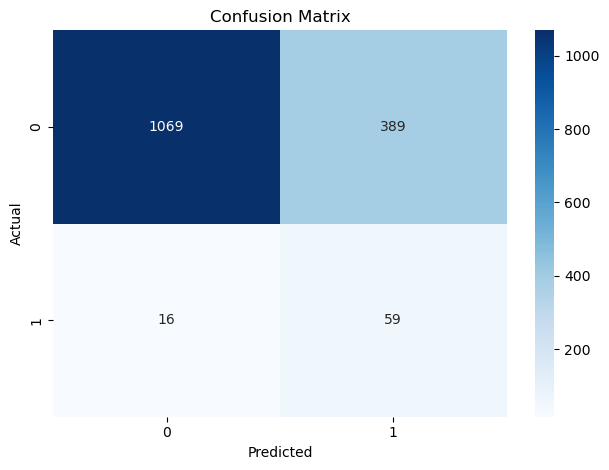

In [147]:
# Predict labels on the test set using the best model from HalvingRandomSearchCV
y_pred = hs_lr.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')



plt.tight_layout()
plt.show()

In [148]:
from sklearn.metrics import classification_report
# Generate and print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84      1458
         1.0       0.13      0.79      0.23        75

    accuracy                           0.74      1533
   macro avg       0.56      0.76      0.53      1533
weighted avg       0.94      0.74      0.81      1533



## SVM

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Initialize a Random Forest classifier for feature selection
forest = RandomForestClassifier(n_estimators=500,random_state=1)

# Create a SelectFromModel object to select important features using the Random Forest as a classifier
sfm = SelectFromModel(forest, threshold=0.1, prefit=False)

# Initialize Support Vector Classifier
svm = SVC() 
# Build a pipeline for SVM
pipe_svc = Pipeline([
    ('smote', SMOTE()),      # Handle class imbalance via oversampling
    ('scaler', StandardScaler()),         # Standardize features  
    ('feature_selector', sfm),              # Select features using Random Forest importance
    ('classifier', svm)                      # Train SVM classifier
])

# Fit the pipeline on the training data
pipe_svc.fit(X_train, y_train)

# evaluate using cross-validation
scores = cross_val_score(estimator=pipe_svc,
                         X=X_train,
                         y=y_train,
                         scoring=scorer, # MCC as performance metric
                         cv=5,
                         n_jobs=-1)
# Print individual CV scores
print(f'CV accuracy scores: {scores}')
print('=' * 50)
# Print mean and standard deviation of CV scores
print(f'CV accuracy: {np.mean(scores):.3f} 'f'+/- {np.std(scores):.3f}')


CV accuracy scores: [0.20639111 0.20116192 0.24784272 0.28047464 0.23967576]
CV accuracy: 0.235 +/- 0.029


 1) nothing__age                   0.248275
 2) nothing__hypertension          0.088572
 3) onehot__ever_married_Yes       0.084635
 4) onehot__smoking_status_formerly smoked 0.082296
 5) nothing__avg_glucose_level     0.077731
 6) onehot__Residence_type_Urban   0.070655
 7) onehot__work_type_Self-employed 0.058252
 8) nothing__bmi                   0.057728
 9) onehot__work_type_Private      0.052921
10) onehot__smoking_status_never smoked 0.052036
11) onehot__gender_Male            0.045589
12) nothing__heart_disease         0.043355
13) onehot__smoking_status_smokes  0.033584
14) onehot__work_type_children     0.004371
15) onehot__work_type_Never_worked 0.000003
16) onehot__gender_Other           0.000000


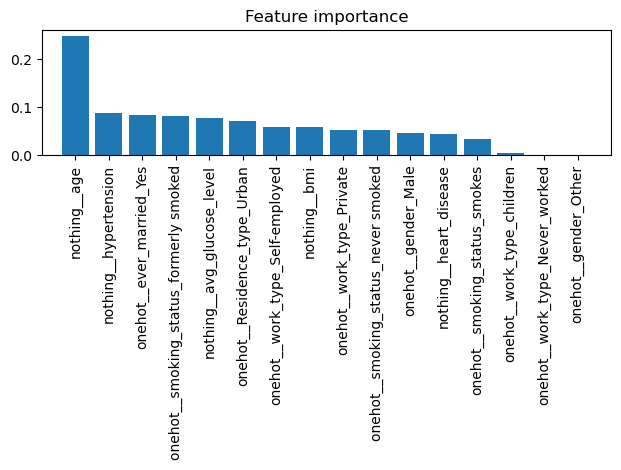

In [158]:
# Get feature labels excluding the target column
feat_labels = health_df.drop(columns=['nothing__stroke']).columns
# Extract feature importances from the fitted Random Forest estimator used in SelectFromModel
importances = sfm.estimator_.feature_importances_
# Sort indices of features by importance in descending order
indices = np.argsort(importances)[::-1]
# Print features ranked by importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))
# Plot feature importances as a bar chart
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### Diagnosing the model and Performance

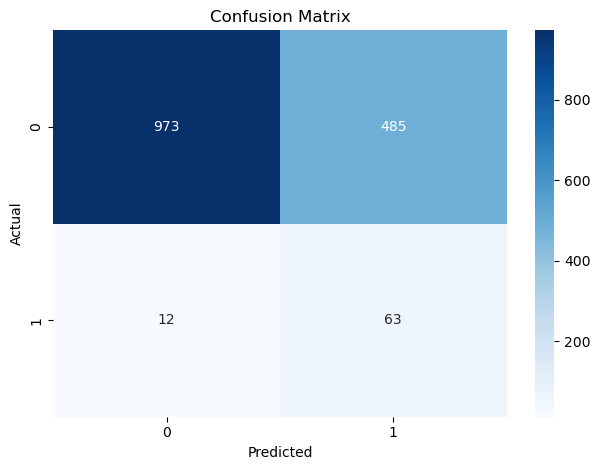

In [159]:
from sklearn.metrics import confusion_matrix
# Predict labels on the test set using the SVM pipeline
y_pred = pipe_svc.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')



plt.tight_layout()
plt.show()

[learning_curve] Training set sizes: [ 286  429  572  715  858 1001 1144 1287 1430 1573 1716 1859 2002 2145
 2288 2431 2574 2717 2861]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  95 | elapsed:   22.3s remaining:   21.8s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:   43.7s finished


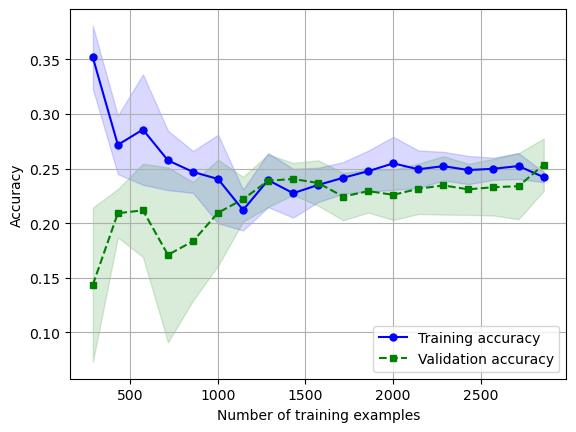

In [160]:
from sklearn.model_selection import learning_curve

# Compute learning curves for the SVM pipeline
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_svc,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1,1.0,19),
                                                        cv=5,
                                                        scoring=scorer,
                                                        verbose=2,
                                                        n_jobs=-1)
# Compute mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

The plot above indicates that the model demonstrates a good bias-variance trade-off, with no clear signs of underfitting or overfitting

In [163]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import scipy.stats



# Define the parameter grid for SVM inside the pipeline
param_grid = [{'classifier__C': param_range,
               'classifier__kernel': ['linear'],
              },
              {'classifier__C': param_range,
               'classifier__kernel': ['rbf'],
               'classifier__gamma': param_range 
              }]
# Initialize HalvingRandomSearchCV for hyperparameter tuning
hs_sv = HalvingRandomSearchCV(pipe_svc,
                           param_distributions=param_grid,
                           n_candidates='exhaust',
                           resource='n_samples',
                           min_resources=300,
                           factor=1.5,
                           random_state=1,
                           scoring=scorer,
                           error_score='raise',
                           n_jobs=-1)

# Fit the hyperparameter search on the training data
hs_sv = hs_sv.fit(X_train, y_train)
# Print the best cross-validated score (MCC)
print(hs_sv.best_score_)
# Print the best hyperparameters found
print(hs_sv.best_params_)
# Evaluate the best SVM model on the test set
print(f'Test Accuracy: {hs_sv.score(X_test, y_test):.3f}')

0.2728117585433151
{'classifier__C': np.float64(4.934834261073333), 'classifier__kernel': 'linear'}
Test Accuracy: 0.234


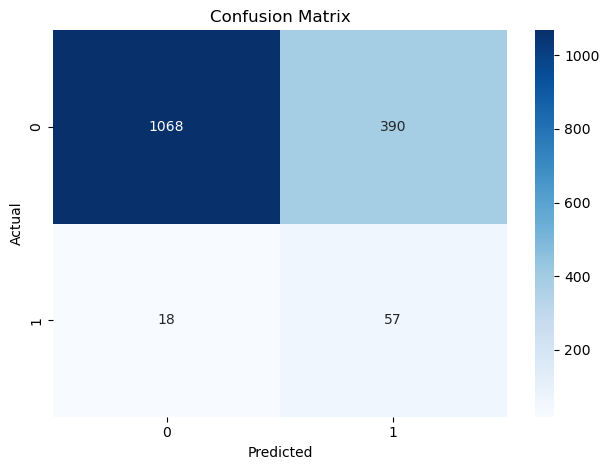

In [162]:
# Predict labels on the test set using the best SVM model from HalvingRandomSearchCV
y_pred = hs_sv.predict(X_test)

# Compute the confusion matrix and visualize the confusion matrix using a heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')



plt.tight_layout()
plt.show()

In [164]:
from sklearn.metrics import classification_report
# Generate and print a classification report for the tuned SVM model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84      1458
         1.0       0.13      0.76      0.22        75

    accuracy                           0.73      1533
   macro avg       0.56      0.75      0.53      1533
weighted avg       0.94      0.73      0.81      1533



## Conclusion 

The logistic regression model performed slightly better than the SVM, although their scores were very close. Initial exploratory analysis indicated significant relationships between stroke and several features, including ever_married, work_type, smoking_status, heart_disease, and hypertension. Additionally, there were significant differences in BMI, glucose levels, and age between stroke and non-stroke groups. Most of these important features were selected by the logistic regression pipeline. In contrast, the SVM pipeline, using Random Forest feature selection, mainly focused on the age feature, as it was the only feature that passed the importance threshold. This explains why the SVM performed slightly worse than logistic regression.